# [CoE202] note 04b. Linear classification (multiclass)

- Class Date : 21.03.25
- Office Hour : -----------
- If you have any questions, upload on KLMS Q&A board, or ask directly at the TA office hours (Zoom)


In this example, we want to find a linear multi-class classifier for a given data set.


In [5]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io

In [6]:
# load data file from Google drive
# from google.colab import drive
# drive.mount("/content/drive")

# mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab_share/data/data_linear_classification_multiclass.mat')
mat = scipy.io.loadmat('./data_linear_classification_multiclass.mat')

data = mat['data']
label = mat['label']

Just like the earlier example, let's start with taking a look at the data.

Below is the function for data visualization.

In [7]:
# define a function to plot data
def show_data_multi_class(data, label):
    fig, ax = plt.subplots()
    ind = 0
    for color in ['tab:blue', 'tab:orange', 'tab:red']:
        current_ind = np.where(label==ind)[1]
        x = data[0,current_ind]
        y = data[1,current_ind]
        ax.scatter(x, y, c=color, edgecolors='none')
        ind +=1

ground truth


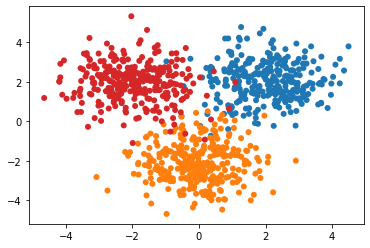

In [8]:
# show ground truth classification
print('ground truth')
show_data_multi_class(data, label)

Now, let's define our linear classifier.

In [9]:
# define our linear classifier
class linear_classifier():

    # initialization
    def __init__(self, W_init, b_init, n_classes ):
        super(linear_classifier, self).__init__()
        self.W = W_init
        self.b = b_init
        self.n_classes = n_classes

    # forward pass
    def forward(self, x):
        z = np.matmul(self.W,x)+self.b
        
        z_exp = np.exp(z)
        y = np.divide(z_exp, np.sum(z_exp, axis=0))
        
        return y

    # backward pass
    def backward(self, x, y, label):

        label_oh = get_one_hot(label, n_classes)
        loss = cross_entropy(y, label_oh)
                
        dLdz = y-label_oh
        dLdb = np.mean(dLdz, axis=1, keepdims=True)
        dLdw = np.matmul(dLdz,x.T)

        loss_avg = np.sum(loss)/x.shape[1]        
        
        prediction_threshold = np.argmax(y,axis = 0 )
        prediction_threshold = np.expand_dims(prediction_threshold, axis = 0)

        accuracy = np.sum(prediction_threshold==label) / label_oh.shape[1]

        return loss_avg, accuracy, dLdw, dLdb

    # update parameters
    def update(self, dW, db):
        self.W = self.W + dW
        self.b = self.b + db

    # retrieve weights
    def getWb(self):
        return self.W, self.b

# define cross entropy loss (for multi-class classification)
def cross_entropy(prediction, label):
    epsilon = 1e-10
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    
    ce = -np.log(prediction)*label
    
    return ce

def get_one_hot(label , n_classes):
    one_hot = np.eye(n_classes)[label.astype('int32').reshape(-1)]
    return np.transpose(one_hot)

Let's construct the classifier and initialize it with random parameters.


In [10]:
# initialize my classifier
W_init = np.random.rand(3,2)
b_init = np.random.rand(3,1)
n_classes = 3 # number of classes 

my_classifier = linear_classifier(W_init, b_init, n_classes)
W, b = my_classifier.getWb()

Here goes a test run (of the untrained classifier)!

current classification


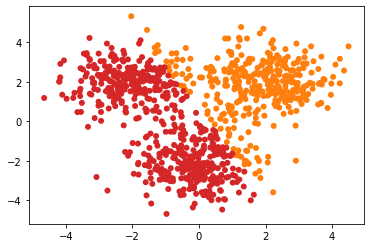

In [11]:
# test our initial (untrained) classifier
prediction = my_classifier.forward(data)
prediction_threshold = np.argmax(prediction,axis = 0)
prediction_threshold = np.expand_dims(prediction_threshold, axis = 0)

# show the performance of untrained classifier
print('current classification')
show_data_multi_class(data, prediction_threshold)

Ok, now let's train the classifier using gradient descent.

In [12]:
# train linear classifier
n_iter = 100
learning_rate = 0.001
loss_iter = np.zeros(n_iter, dtype=float)
accuracy_iter = np.zeros(n_iter, dtype=float)
for iter in range(n_iter):
    prediction =  my_classifier.forward(data)
    [loss, accuracy, dLdw, dLdb] =  my_classifier.backward(data, prediction, label)
    dW = -learning_rate*dLdw
    db = -learning_rate*dLdb
    my_classifier.update(dW, db)
    loss_iter[iter] = loss
    
    prediction_threshold = np.argmax(prediction,axis = 0 )
    prediction_threshold = np.expand_dims(prediction_threshold, axis = 0)

    accuracy_iter[iter] = accuracy

    if iter%10 == 0:
        print('Epoch: {}/{}.............'.format(iter, n_iter), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 0/100............. Loss: 1.4164
Epoch: 10/100............. Loss: 0.1320
Epoch: 20/100............. Loss: 0.1157
Epoch: 30/100............. Loss: 0.1088
Epoch: 40/100............. Loss: 0.1049
Epoch: 50/100............. Loss: 0.1024
Epoch: 60/100............. Loss: 0.1007
Epoch: 70/100............. Loss: 0.0995
Epoch: 80/100............. Loss: 0.0986
Epoch: 90/100............. Loss: 0.0979


Let's visualize the loss function.

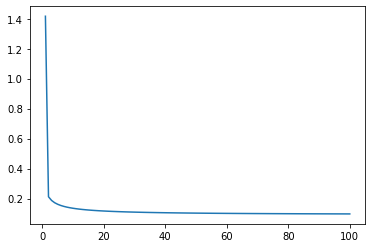

In [13]:
# show loss during training
plt.plot( range(1,n_iter+1), loss_iter)  

Let's visualize the accuracy.

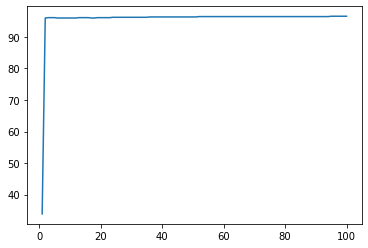

In [14]:
# show accuracy during training
plt.plot(  range(1,n_iter+1), 100*accuracy_iter)  

Lastly, let's visualize how well our classifier performs.

current classification


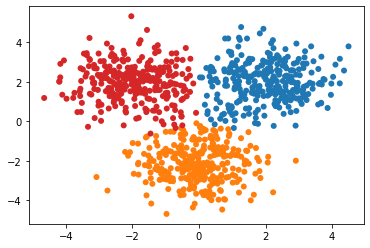

In [15]:
# show result from trained classifier
print('current classification')
show_data_multi_class(data, prediction_threshold)